# Machine learning - sprint 1
Authors: Allart Ewoud, Van Hees Maxime, Breda Bram

## Importing data

In [69]:
# Import pandas and read csv using pandas
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from math import nan
import plotly.express as px
from sklearn import preprocessing
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

from time import strptime
import datetime

In [2]:
original_df = pd.read_csv("tripadvisor_dataset/restaurant_listings.csv")

# display the data and see how it formulated
pd.set_option("display.max_columns", None)
original_df.head()

,rank,restaurant name,general rating,number of reviews,tags,address,phone number,website url,menu url,timetable,email address,travelers choice,michelin,food rating,service rating,value rating,atmosphere rating,description,dutch description,price range,cuisines,special diets,meals,restaurant features,id
0,#1,Kin Khao - Thai Eatery,5.0 of 5 bubbles,922 reviews,$$ - $$$|Thai|Healthy|Vegetarian Friendly,"Donkersteeg 21-23, Ghent 9000 Belgium",+32 468 10 59 59,http://www.kinkhao.be/,http://www.kinkhao.be/site/menu/,True,gent@kinkhao.be,True,False,5.0,5.0,4.5,-1.0,"Differing from formal dining establishments, K...",NaN,€10 - €28,"Thai, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Reservations, Seating, Serves Alcohol, Free Wi...",13969825
1,#1,'t Sleutelgat,5.0 of 5 bubbles,200 reviews,$$$$|French|Belgian|European,"Kasseide 78, Ninove 9400 Belgium",+32 54 56 63 09,http://www.restaurant-sleutelgat.be/,NaN,True,restaurant_sleutelgat@telenet.be,False,True,5.0,5.0,4.5,5.0,NaN,NaN,€32 - €74,"French, Belgian, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Free Wifi, Reservations, Outdoor Seating, Seat...",740727
2,#2,Royal India Restaurant,4.5 of 5 bubbles,774 reviews,$$ - $$$|Indian|Asian|Vegetarian Friendly,"Donkersteeg 19 Near hotel novotel gent, Ghent ...",+32 497 40 78 27,NaN,NaN,True,royalindiabelgium@gmail.com,True,False,4.5,4.5,4.5,-1.0,"For fresh ingredients and bold flavour, dine i...",NaN,€15 - €30,"Indian, Asian","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Late Night, Drinks","Takeout, Reservations, Seating, Highchairs Ava...",12188645
3,#3,Roots,5.0 of 5 bubbles,282 reviews,$$ - $$$|Belgian|European|Healthy,"Vrouwebroersstraat 5, Ghent 9000 Belgium",+32 9 310 67 73,http://www.rootsgent.be/,NaN,True,Info@rootsgent.be,True,True,5.0,4.5,5.0,-1.0,NaN,NaN,€40 - €80,"Belgian, European, Healthy",NaN,"Lunch, Dinner","Reservations, Outdoor Seating, Seating, Serves...",9710340
4,#1,Mirage,4.5 of 5 bubbles,240 reviews,$$ - $$$|French|Belgian|Dutch,"Brusselsestraat 99, Dendermonde 9200 Belgium",+32 52 55 48 26,http://mirage-ma.be/,http://mirage-ma.be/feestdagenmenus/,True,contact@mirage-ma.be,True,False,4.5,4.5,4.5,-1.0,NaN,NaN,€16 - €64,"French, Belgian, Dutch, Seafood, European","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Accepts Visa, Reservations, Outdoor Seating, S...",8298124


In [3]:
original_df_reviews = pd.read_csv("tripadvisor_dataset/reviews.csv")
original_df_reviews.head()

,id,reviewer name,title,date,rating,review
0,13969825,bertd818,supper snelle en lekkere lunch,"September 26, 2022",5.0,"supper lekker gegeten tijdens de middag, als w..."
1,13969825,593laetitiad,Un délicieux repas aux saveurs de la Thaïlande,"September 24, 2022",5.0,Un menu lunch très bien équilibré aux niveaux ...
2,13969825,612ellen,Altijd leuk om terug te komen,"September 19, 2022",5.0,Super gezellig restaurant met super bediening ...
3,13969825,j0ycal,"Perfect onthaal/gastvrijheid, superlekker eten...","September 19, 2022",5.0,"Perfect onthaal, lekker eten. Heel goede lunch..."
4,13969825,Global45882037169,genieten,"September 19, 2022",5.0,"verrassend lekker gegeten, een mooi en rustig ..."


## Split in test & train data

The goal of machine learning is to build models on train data that are able to make predictions on unseen test data. So we first try to split our data into a train set and a test set before we move on to the other steps.

In [4]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(original_df, random_state=0, train_size = 0.8)
df_train_reviews, df_test_reviews = train_test_split(original_df_reviews, random_state=0, train_size = 0.8)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df_train.select_dtypes(include=numerics)

## Data clean-up

The first task the have a better grasp on the data is cleaning it up.

### General rating, number of reviews & rank

As general rating is a string, we only keep the actual rating value as a float. The -1 values are changed into NaN.
The same is true for number of review. We only keep the actual number as an integer.
For the rank we only store the number and leave out the #-symbol



In [5]:
# general rating
df["general rating"] = df_train["general rating"].apply(lambda x: float(str(x).split(' ')[0]))
df["general rating"] = pd.to_numeric(df["general rating"])
df["general rating"] = df["general rating"].replace(-1, np.nan)

# number of reviews
df["number of reviews"] = df_train["number of reviews"].apply(lambda x: int(str(x).split(' ')[0]))
df["number of reviews"] = pd.to_numeric(df["number of reviews"])

# rank
df["rank"] = df_train["rank"].str.split("#").str[1]
df["rank"] = pd.to_numeric(df["rank"])

df.head()

,food rating,service rating,value rating,atmosphere rating,id,general rating,number of reviews,rank
220,4.0,4.0,4.0,4.0,1127788,4.0,179,119.0
1103,4.0,3.5,3.5,-1.0,12272003,3.5,79,430.0
17,4.5,4.5,4.5,4.0,784367,4.5,254,11.0
58,4.5,4.5,4.5,-1.0,8279642,4.5,120,1.0
847,4.0,4.5,4.5,-1.0,10037978,4.5,20,26.0


### Restaurants with no reviews

When looking at the data we see that a good amount of restaurants have no reviews. These restaurants also don't contain data for general rating, food rating, service rating and value rating. This leaves us with 2 possible options:

- Option 1: we remove the restaurants that have no reviews, and thus no ratings. This can be done like this:

```df2 = df.loc[(df['number of reviews'] == 0) & (df['general rating'] == -1.0)]```

- Option 2: we don't remove them and assume the model will learn by itself that these entries aren't that useful.

We decided to go with option 2.

### Price range
The price range column has a specific layout: `€cheapest_food - €most_expensive_food`. We will split this in a lower and upper bound.

In [139]:
upper_bound = df_train["price range"].str.split(" - ").str[1]
upper_bound = upper_bound.str.split('€').str[1]
upper_bound = pd.to_numeric(upper_bound)

lower_bound = df_train["price range"].str.split(" - ").str[0]
lower_bound = lower_bound.str.split('€').str[1]
lower_bound = pd.to_numeric(lower_bound)

We take a quick look at the spread in the lower bound and upper bound. The blue bars correspond with the lower bound and the orange ones with the upper bound. These histograms learns us that the majority of restaurants in our dataset are on the 'cheaper' side. The amount of very expensive restaurants is significantly less.

(0.0, 105.0)

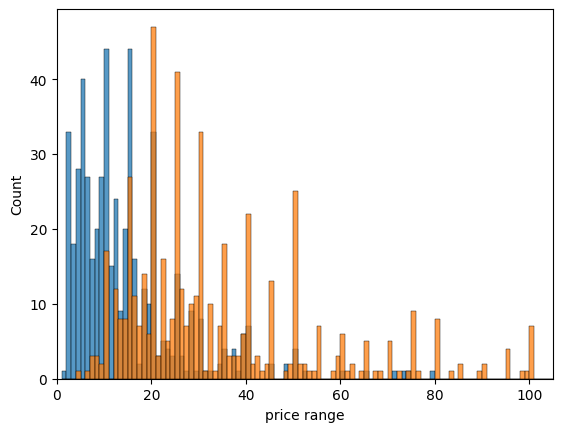

In [140]:
fig, ax = plt.subplots()
for a in [lower_bound, upper_bound]:
    sn.histplot(a, bins=range(1, 110, 1), ax=ax, kde=False)
ax.set_xlim([0, 105])

We now take the average of the price range. This can give a general idea of the price class of the restaurant. We decided to create 10 different price classes in total and each entry is assigned to one of those 'bins'. All the restaurants that have no pricing available are not assigned to a bin and receive a NaN value in the price range column.

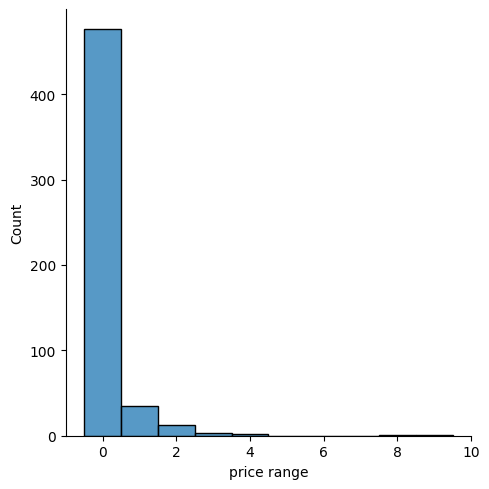

In [8]:
average = (upper_bound-lower_bound)/2

transformer = preprocessing.FunctionTransformer(pd.cut, kw_args={'bins': 10, 
                                                                 'labels': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
                                                                 'retbins': True})
avg_quantfied = transformer.fit_transform(average)

#visualize the data
sn.displot(avg_quantfied[0])
df['price range'] =  pd.to_numeric(avg_quantfied[0])

### Food, service & value rating

Each restaurant has multiple rating categories: food, service and value ratings. There is also a general rating category. We visualize the correlations between those rating categories in a scatter matrix. 

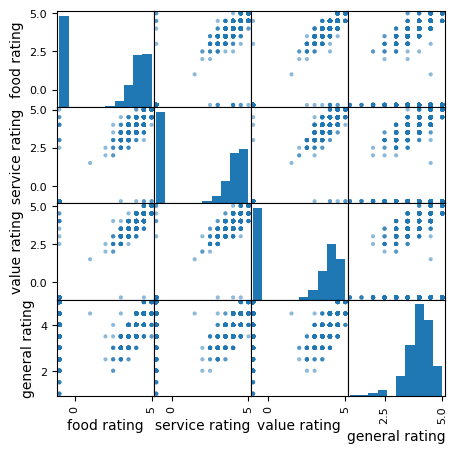

In [9]:
pd.plotting.scatter_matrix(df[["food rating","service rating","value rating", "general rating"]], figsize = (5,5));

Notice in the chart above, that in food rating, service rating, value rating & atmosphere rating there are alot of -1 values. We can replace those values with the mean value of those ratings.

In [10]:
mean = df["service rating"].loc[df["service rating"] != -1].mean()
df["service rating"] = df["service rating"].replace(-1,mean)

mean = df["food rating"].loc[df["food rating"] != -1].mean()
df["food rating"] = df["food rating"].replace(-1,mean)

mean = df["value rating"].loc[df["value rating"] != -1].mean()
df["value rating"] = df["value rating"].replace(-1,mean)

We plot the scatter matrix again.

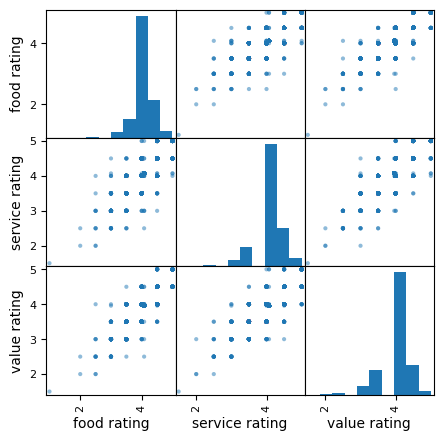

In [11]:
pd.plotting.scatter_matrix(df[["food rating","service rating","value rating"]], figsize = (5,5));

We drop the 'atmosphere rating' column as it almost contains no data.

In [12]:
#df["atmosphere rating"].value_counts()
#df = df.drop(columns=["atmosphere rating"])

### Meals

Each restaurant has a comma separted list of which kind of meals it has to offer. This can be 'drinks', 'dinner', 'lunch', 'late night', 'brunch' or 'breakfast'. We will use one-hot encoding to represent the meals a restaurant offers.

In [13]:
# Getting all different types off meals
types = []
for i in df_train['meals'].fillna(value=""):
    types.extend(map(lambda x: x.strip(), i.split(",")))
types = set(types)


# For every type we are going to create a column that represents the type
for i in types:
    if i != "":
        df[i] = df_train["meals"].apply(lambda x: str(x)).apply(lambda x: int(i in x))

Visualizing the result:

In [14]:
df.head()

,food rating,service rating,value rating,atmosphere rating,id,general rating,number of reviews,rank,price range,Breakfast,Drinks,Lunch,Late Night,Dinner,Brunch
220,4.0,4.0,4.0,4.0,1127788,4.0,179,119.0,0.0,0,0,1,1,1,0
1103,4.0,3.5,3.5,-1.0,12272003,3.5,79,430.0,NaN,0,0,0,0,1,0
17,4.5,4.5,4.5,4.0,784367,4.5,254,11.0,0.0,0,0,0,0,1,0
58,4.5,4.5,4.5,-1.0,8279642,4.5,120,1.0,0.0,0,0,1,0,1,0
847,4.0,4.5,4.5,-1.0,10037978,4.5,20,26.0,NaN,0,0,0,0,1,0


### Cuisines

The amount of cuisines is extensive. We can look at the most occuring cuisines and one-hot encode these. 

The 50th precentile shows us how many times a specific type of cuisine occurs in the data. We can use the 50th precentile as a threshold to decide if the cuisine is one-hot encoded or added to 'others'.

In [44]:
types = []
for i in df_train['cuisines'].fillna(value=""):
    types.extend(map(lambda x: x.strip(), i.split(",")))
types = set(types)
print("Amount of different cuisines:",len(types))

# prints the amout of times a cuisine occurs in the data
# set _print on True to enable printing of frequencies
_print = True


freq = {}
for i in types:  
    if i != "":
        freq[i] = df_train["cuisines"].apply(lambda x: str(x)).apply(lambda x: int(i in x)).sum()


#print("\n")
#print("-"*20, "frequency tabel", "-"*20) 
#for key, value in freq.items():
#    print('{:<25}'.format(key ), '{:>4}'.format(value) , "times")
percentile75 = np.quantile(list(freq.values()), 0.75)
percentile50 = np.quantile(list(freq.values()), 0.5)

print("50-percentile:", percentile50)
print("75-percentile:", percentile75)


freq = { key:value for (key,value) in freq.items() if value > percentile50}

for (key,value) in freq.items():
    if key != "":
        df[key] = df_train["cuisines"].apply(lambda x: int(key in str(x)))
   
#TODO add others column
#df['others'] = df[subset].eq(False).all(axis='columns').apply(int)

Amount of different cuisines: 93
50-percentile: 6.0
75-percentile: 37.5


We can create a pie chart of the most occuring cuisines types. We only show the top 10 most occuring ones, the rest is placed in 'others'.

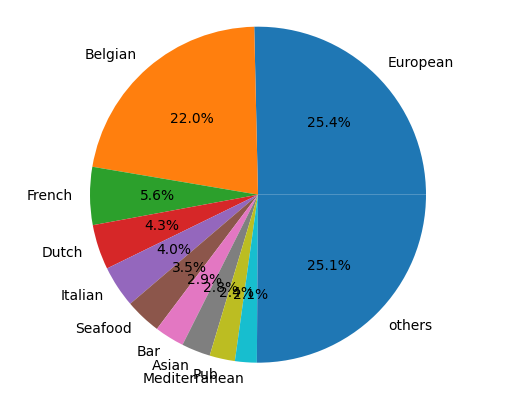

In [46]:
# create a list of the top 10 cuisines
top10 = []
for i in range(10):
    top10.append(max(freq, key=freq.get))
    freq.pop(max(freq, key=freq.get))

# create a list of the rest of the cuisines
others = []
for key, value in freq.items():
    others.append(key)

# create a list of the values of the top 10 cuisines
top10_values = []
for i in top10:
    top10_values.append(df[i].sum())

# create a list of the values of the rest of the cuisines
others_values = []
for i in others:
    others_values.append(df[i].sum())

# create a list of the labels
labels = top10
labels.append("others")

# create a list of the values
values = top10_values
values.append(sum(others_values))

# create a pie chart
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 
plt.show()




### Address

The address field has the following structure in most cases:

1. Streetname + number + ","
2. City + corresponding postal code
3. Country (here Belgium in all cases)

Upon closer inspection we can see that sometimes field 1. and 2. are comma-separted, sometimes not.
The number behind the streetname sometimes consists of two numbers (can be split with ' ' or '-' or '/' or ...)

In [117]:
locator = Nominatim(user_agent="ML")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

def get_coordinates(name):
    location = locator.geocode(name)
    if location is None:
        return pd.Series([np.nan, np.nan])
    else:
        return pd.Series([location.latitude, location.longitude])
    
df[['latitude','longitude']] = df_train['address'].fillna('').apply(get_coordinates)
df

GeocoderServiceError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)

In [48]:
fig = px.scatter_mapbox(df[['latitude', 'longitude']], lat="latitude", lon="longitude", height=500, width=700)

fig.update_layout(mapbox_style="open-street-map")
fig.show()
# https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

KeyError: "None of [Index(['latitude', 'longitude'], dtype='object')] are in the [columns]"

### Restaurant features

Eacht restaurant has a list of different features it has. These features represent the different ammenities.  We can extract those features and create a chart that shows which features occur the most.

Amount of features: 39


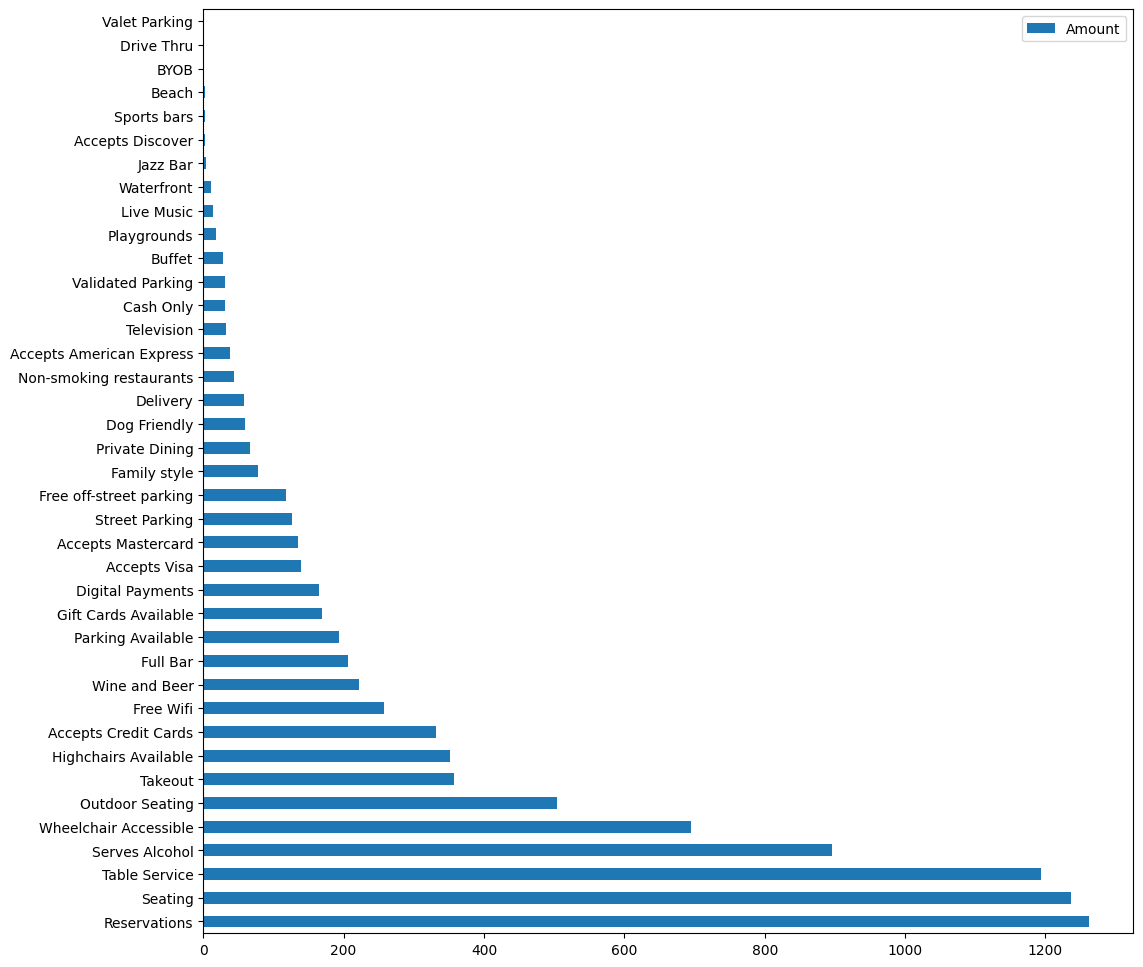

In [50]:
# Create a dict that holds all restaurant feautures and how much they appear
feature_types = {}
for i in df_train['restaurant features'].fillna(value=""):
    for f in i.split(','):
        if i != "":
            if f.strip() in feature_types.keys():
                feature_types[f.strip()] += 1
            else:
                feature_types[f.strip()] = 1
           
print("Amount of features:" , len(feature_types.keys()))

# omzetten naar dataframe
df_features = pd.DataFrame(feature_types, index=[0]).transpose()
df_features.columns = ['Amount']
df_features.sort_values(['Amount'], ascending=False, inplace=True)
df_features.plot(kind='barh', figsize=(12,12))

for (key,value) in feature_types.items():
    if key != "":
        df[key] = df_train["restaurant features"].apply(lambda x: int(key in str(x)))

### Special Diets

Some restaurants offer special diets. We can look if these special diets have an influence on the general rating of the restaurant.

Amount of diets: 5
{'Vegetarian Friendly': 685, 'Vegan Options': 167, '': 1366, 'Gluten Free Options': 145, 'Halal': 4}
Average review score per diet type {'Vegetarian Friendly': 4.086131386861314, 'Vegan Options': 4.254491017964072, '': 4.086676217765043, 'Gluten Free Options': 4.2620689655172415}


<AxesSubplot: title={'center': 'Average review score per diet'}>

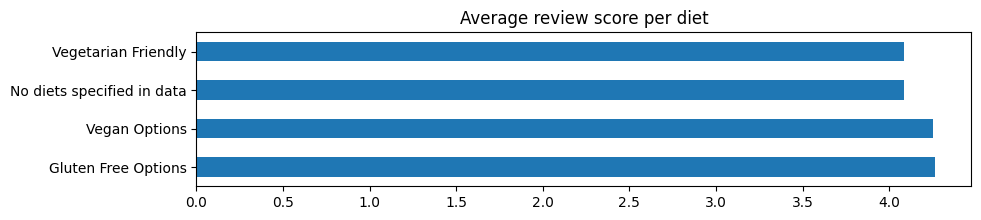

In [51]:
# check which special diets exist in the data
diet_types = {}
for i in df_train['special diets'].fillna(value=""):
    for f in i.split(','):
            if f.strip() in diet_types.keys():
                diet_types[f.strip()] += 1
            else:
                diet_types[f.strip()] = 1
           
print("Amount of diets:" , len(diet_types.keys()))
print(diet_types)

# check if available diet options have influence on the average rating per restaurant
diet_avg_review = {}
for d in diet_types.keys():
    if len(df_train[df_train['special diets'].str.contains(d) == True]) >=  100: #only use data of a diet type if there are more than 100 restaurants with that diet type
        diet_avg_review[d] = df[df_train['special diets'].str.contains(d) == True]['general rating'].mean()
print('Average review score per diet type',diet_avg_review)
df_diets = pd.Series(diet_avg_review).rename({'': 'No diets specified in data'})
df_diets.sort_values(ascending=False).plot(kind='barh', figsize=(10,2), title='Average review score per diet')


The graph above shows that restaurants with vegan and gluten free options have a higher average review score. 

### Price tag

Bij price de andere price metriek zagen we dat er zeer veel data ontbrak, de andere metriek heeft ook een aantal nadelen, het is namelijk zo dat 1 goedkoop gericht op 1 door gerecht in een resto de volleige metriek beinvoeld.

In the price tag column we see alot of data is missing. 

In [55]:
price_options = []

for i in df_train['tags'].fillna(value=""):
    for j in i.split('|'):
        if '$' in j:
            price_options.append(j)
            
price_options = set(price_options)
price_options = sorted(price_options, key= lambda x: len(x.split('-')[0].strip()))
       
def formatPriceRange(tags):
    for i in reversed(range(0,3)):
        if price_options[i] in tags:
            return i + 1
    return nan
       
df["price tag"] = df_train['tags'].apply(lambda x: formatPriceRange(str(x)))

### Website and menu

Each restaurant can list an URL to their website and their menu. We can look at the average score based on the presence of those URLs.

<AxesSubplot: title={'center': 'Average score based on urls'}>

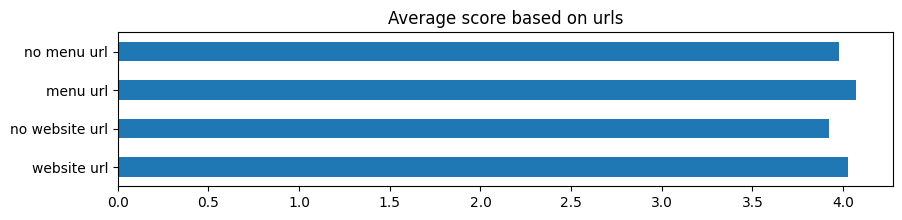

In [57]:
df['has website url'] = df_train['website url'].apply(lambda x: str(x) != "nan")
df['has menu url'] = df_train['menu url'].apply(lambda x: str(x) != "nan")

means = {}
means['website url'] = df.loc[df['has website url'] == 1]['general rating'].mean()
means['no website url'] = df.loc[df['has website url'] == 0]['general rating'].mean()

means['menu url'] = df.loc[df['has menu url'] == 1]['general rating'].mean()
means['no menu url'] = df.loc[df['has menu url'] == 0]['general rating'].mean()
pd.Series(means).plot(kind='barh', figsize=(10,2), title='Average score based on urls')

We can see that the presence of an URL has a very little influence on the average score of the restaurant.

### Michelin, travelers choice and timetable

These columns can easily be converted to boolean values. We can count the amount of times they occur.

False    1987
True       77
Name: michelin, dtype: int64
False    2017
True       47
Name: travelers choice, dtype: int64
True     1141
False     923
Name: timetable, dtype: int64
Average review score per michelin {0: 4.0, 1: 4.3441558441558445}
Average review score for restaurants with michelin star: 4.3441558441558445


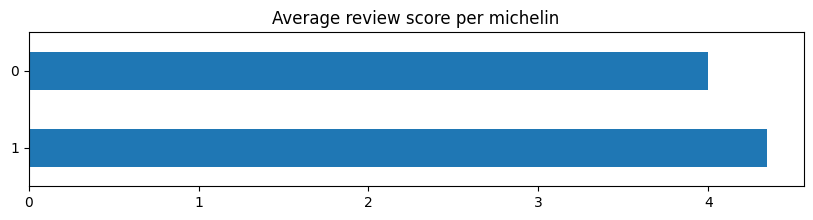

In [64]:
print(df_train['michelin'].value_counts())
print(df_train['travelers choice'].value_counts())
print(df_train['timetable'].value_counts())

df["michelin"] = df_train["michelin"].astype(int)
df["travelers choice"] = df_train["travelers choice"].astype(int)
df["timetable"] = df_train["timetable"].astype(int)

# compare if michelin, travelers choice and timetable have influence on the average rating per restaurant
michelin_avg_review = {}
for d in [0,1]:
    michelin_avg_review[d] = df[df_train['michelin'] == d]['general rating'].mean()
print('Average review score per michelin',michelin_avg_review)
df_michelin = pd.Series(michelin_avg_review).rename({'': 'No diets specified in data'})
df_michelin.sort_values(ascending=False).plot(kind='barh', figsize=(10,2), title='Average review score per michelin')

michelin_avg_review = df[df_train['michelin'] == 1]['general rating'].mean()
print('Average review score for restaurants with michelin star:', michelin_avg_review)


We can see that the presence of Michelin has a very little influence on the average score of the restaurant.

### Phone number and Email address

Has phone number?
True     1888
False     176
Name: phone number, dtype: int64
Has email address?
True     1077
False     987
Name: email address, dtype: int64


<AxesSubplot: title={'center': 'Average score based on phone number and email address'}>

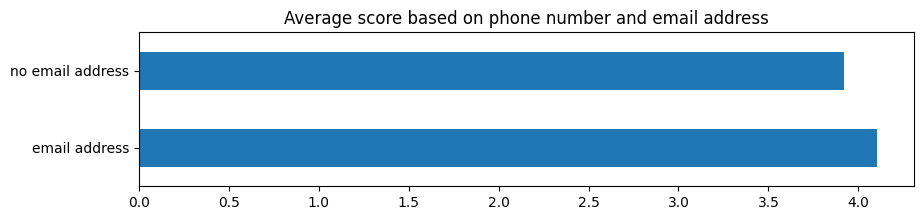

In [63]:
print("Has phone number?")
print(df_train['phone number'].fillna('').astype(bool).value_counts())
print("Has email address?")
print(df_train['email address'].fillna('').astype(bool).value_counts())

df['phone number'] = df_train['phone number'].fillna('').astype(bool).astype(int)
df['email address'] = df_train['email address'].fillna('').astype(bool).astype(int)

# compare the presence of a phone number and email address with the average rating
means = {}
means['email address'] = df.loc[df['email address'] == 1]['general rating'].mean()
means['no email address'] = df.loc[df['email address'] == 0]['general rating'].mean()
pd.Series(means).plot(kind='barh', figsize=(10,2), title='Average score based on phone number and email address')


### Tags 
 Check if there is data in the tags column that is not already in other columns (excluding the price tag, because we already covered that). 

In [74]:
# split and strip cuisines (,)
# split and strip special diets (,)
# split and strip tags (|)
columnsToAdd = []
def testRow(cuisines, specialDiets, tags):
    storedData = []
    # first add all the data that is already stored by processing the cuisines and special diets columns
    for i in str(cuisines).split(','):
        if (i != 'nan'):
            storedData.append(i.strip())  
    for i in str(specialDiets).split(','):
        if (i != 'nan'):
            storedData.append(i.strip()) 
    

    # check if all the data in the tags column is already stored      
    for i in str(tags).split('|'):
        if('$' not in i):
            if(i not in storedData and i != 'nan'):
                columnsToAdd.append(i.strip())
                print('Error in tag:', i, tags)
                
    
df_train[['cuisines','special diets','tags']].apply(lambda x: testRow(*x), axis=1)

columnsToAdd = set(columnsToAdd)

print(columnsToAdd)

Error in tag: Hong Kong $$ - $$$|Healthy|Street Food|Hong Kong
Error in tag: Szechuan $$ - $$$|Chinese|Asian|Szechuan
Error in tag: International $$ - $$$|Japanese|International|Asian
Error in tag: Asian $$ - $$$|Japanese|International|Asian
Error in tag: Quick Bites $|Quick Bites|Healthy|Vegetarian Friendly
Error in tag: Cantonese $$ - $$$|Chinese|Asian|Cantonese
Error in tag: Cantonese $|Chinese|Cantonese|Szechuan
Error in tag: Szechuan $|Chinese|Cantonese|Szechuan
Error in tag: Szechuan $$ - $$$|Chinese|Asian|Szechuan
Error in tag: Quick Bites $$ - $$$|Quick Bites|Mexican
Error in tag: Szechuan $|Chinese|Asian|Szechuan
Error in tag: Cantonese $$ - $$$|Chinese|Cantonese
Error in tag: Shanghai $$ - $$$|Chinese|Asian|Shanghai
Error in tag: Cantonese $|Chinese|Cantonese
{'International', 'Asian', 'Szechuan', 'Shanghai', 'Cantonese', 'Hong Kong', 'Quick Bites'}


There seem to be some colums missing in our df dataframe, there is data in the tags column that is not present in any other column of a certain element. We add the missing columns to the df:

In [75]:
def addColumnValues(cuisines, specialDiets, tags, column):
    if (column in (str(tags).split('|') or str(cuisines).split(',') or str(specialDiets).split())):
        return 1
    return 0

    
for i in columnsToAdd:
    df[i] = df_train[['cuisines','special diets','tags']].apply(lambda x: addColumnValues(*x,i), axis=1)

### Restaurant popularity and Average review
Because there is no column that cal tell us how popular a restaurant is, we will try to estimate the popularity of a restaurant by taking the amount of reviews in consideration. We assume that if a restaurant gets a lot of reviews, alot of people go there. We also take the interval between the first and the last review into account. If we divide the amount of reviews by the interval we get a value that estimates the popularity of the restaurant. We also calculate the average review score for every restaurant that has reviews available, this way we get a more accurate result than by using the 'general rating' column in the restaurant_listings.csv dataset, because 'general rating' only shows values rounded to 0.5

In [100]:
from time import strptime

popularity_dict = {}
average_review_dict = {}

all_ids = df_train_reviews['id'].unique()
df_train_reviews['id'].value_counts()
df_train_reviews['datev2'] = df_train_reviews['date'].apply(lambda x: datetime.datetime.strptime(x,"%B %d, %Y"))

for id in all_ids:
    rev = df_train_reviews.loc[df_train_reviews['id'] == id]
    maxdate = rev['datev2'].max()
    mindate = rev['datev2'].min()
    average_review = rev['rating'].mean()
    interval = maxdate - mindate
    amount = rev.shape[0]
    if interval.days > 0:
        popularity = amount/interval.days
    else:
        popularity = 0
    popularity_dict[id] = popularity
    average_review_dict[id] = average_review

# add popularity values to df

def fillPopularityValue(x,dictionary):
    if x in dictionary.keys():
        return dictionary[x]
    else:
        return nan

df['popularity'] = df_train['id'].apply(lambda x: fillPopularityValue(x,popularity_dict))
df['average review'] = df_train['id'].apply(lambda x: fillPopularityValue(x,average_review_dict))

## Data analysis

### Michelin

- To start off, the ratings are checked to make sure there are no negative values. We do this cause negative values could influence the results.
- Subsequently we look at what michelin means in terms of ratings.

---------- Amount of negative values : ----------
value rating 0
general rating 0
service rating 0
food rating 0


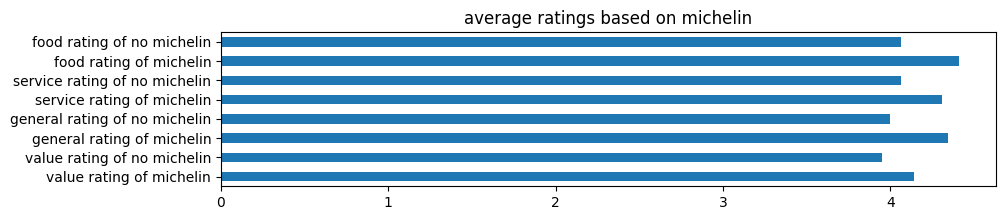

In [85]:
ratings = {"general rating", "food rating", "service rating", "value rating"}

print('-'*10,"Amount of negative values :",'-'*10)
for i in ratings:
    print(i,df[i].loc[df[i] < 0].count())
    


avg_ratings = {}

for i in ratings:
    avg_ratings[i + ' of michelin'] = df.loc[df['michelin'] == 1][i].mean()
    avg_ratings[i + ' of no michelin'] = df.loc[df['michelin'] == 0][i].mean()
    
pd.Series(avg_ratings).plot(kind='barh', figsize=(10,2), title='average ratings based on michelin');

Notice in the chart above, that michelin restaurants on average score higher. It is here important to note that we do not conclude that a michelin restaurant will give a restaurant higher ratings. It is rather so that only very good restaurants become michelin restaurants an so logicly they recuived on average higher ratings.

### Timetable

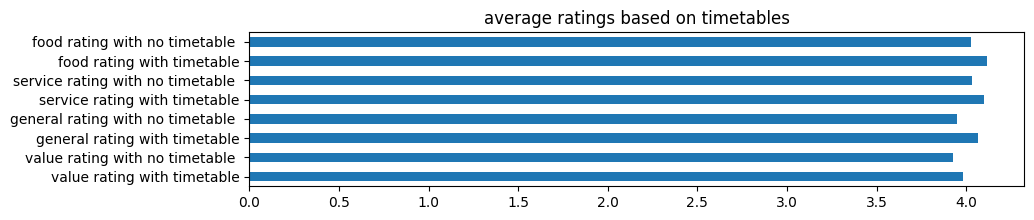

In [84]:
avg_ratings = {}
for i in ratings:
    avg_ratings[i + ' with timetable'] = df.loc[df['timetable'] == 1][i].mean()
    avg_ratings[i + ' with no timetable '] = df.loc[df['timetable'] == 0][i].mean()
    
pd.Series(avg_ratings).plot(kind='barh', figsize=(10,2), title='average ratings based on timetables');

Notice in the chart above, that on average restaurants with a timetable score higher. 

It's important to realise that this isn't considered a factor that influences the rating directly. There can be multiple reasons that restaurants that use timetable can have a higher score. Altough, this can be seen as a sign of professionalism and that might result in higher scores.

### Travelers choice

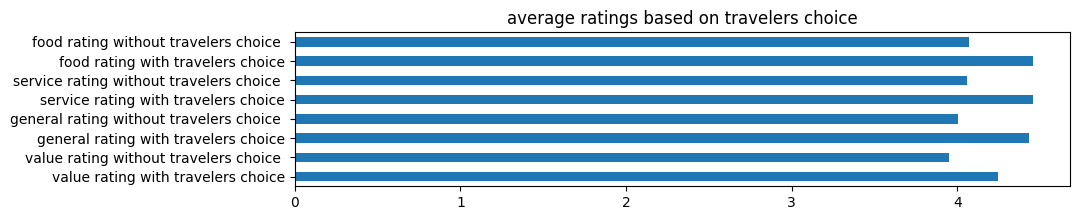

In [83]:
avg_ratings = {}
for i in ratings:
    avg_ratings[i + ' with travelers choice'] = df.loc[df['travelers choice'] == 1][i].mean()
    avg_ratings[i + ' without travelers choice '] = df.loc[df['travelers choice'] == 0][i].mean()
    
pd.Series(avg_ratings).plot(kind='barh', figsize=(10,2), title='average ratings based on travelers choice');

We can see that restaurants that are marked as 'travelers choice' have a higher score on average.

### Restaurant features


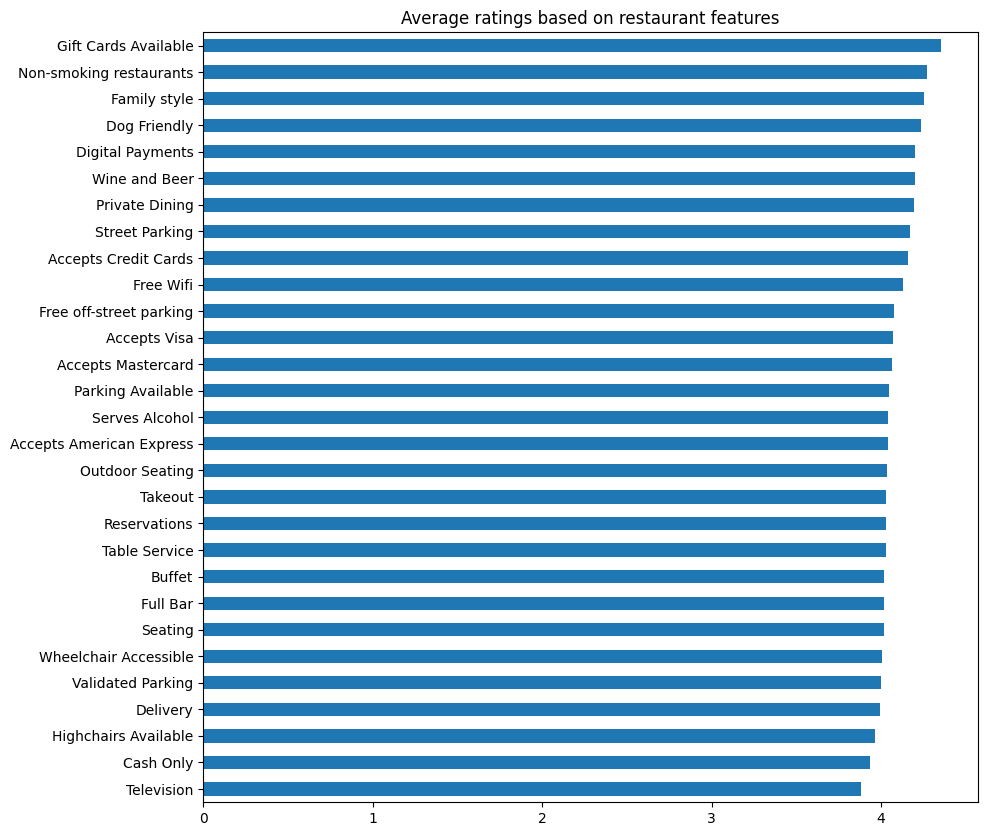

In [87]:
percentile25 = np.quantile(list(feature_types.values()), 0.25)
avg_ratings = {}
for i in feature_types.keys():
    tmp = df.loc[df[i]== 1]
    if (tmp.shape[0] > percentile25): # only use features that occur enough times, because if it only occurs a few times, results may be inaccurate
        avg_ratings[i] = tmp['general rating'].mean()
pd.Series(avg_ratings).sort_values().plot(kind='barh', figsize=(10,10), title='Average ratings based on restaurant features');

The graph above shows that having certain features in a restaurant can result in a higher review score on average. Note that the restaurant features near the bottom are not necessarily bad features to have, it may be that customers don't really care about it as well.  

### Ratings

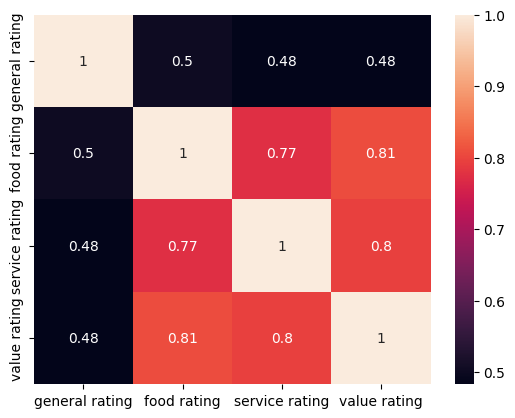

In [89]:
sn.heatmap(df[["general rating", "food rating", "service rating", "value rating"]].corr(), annot=True);

Notice in the chart above the red colering, this indicates a that food rating, value rating and service rating are highly correlated(0,7 - 0,9). At last you can notice that general rating is low(0,3 - 0,5) to moderately(0,5 - 0,7) correlated to the other ratings.

### Ratings compared to price

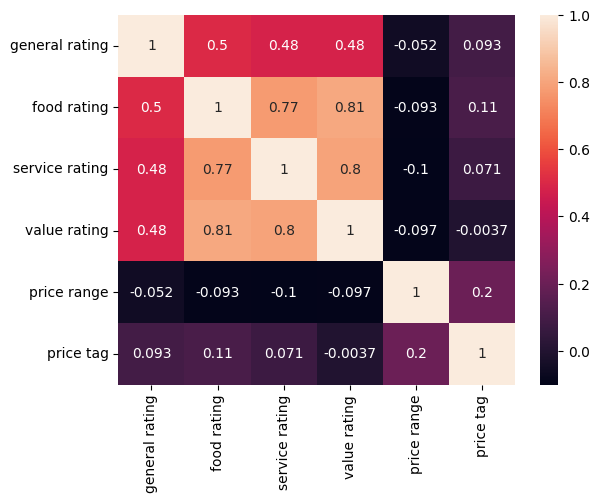

In [91]:
sn.heatmap(df[["general rating", "food rating", "service rating"
               , "value rating",'price range','price tag']].corr(), annot=True);

In the chart above you can notice that there isn't a significant correlation between the price and the rating of a restaurant.

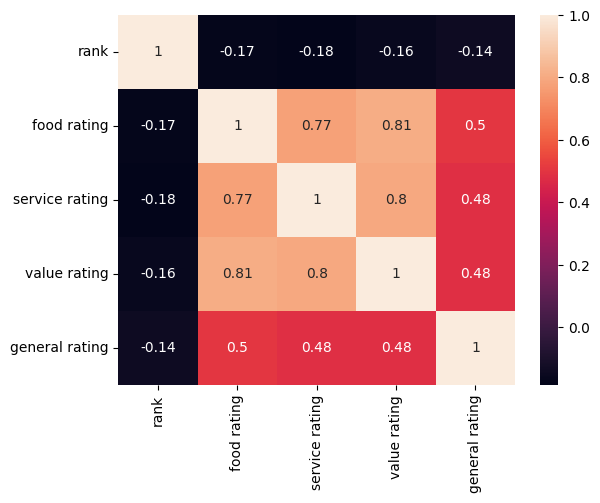

In [92]:
sn.heatmap(df[["rank", "food rating", "service rating"
               , "value rating",'general rating']].corr(), annot=True);

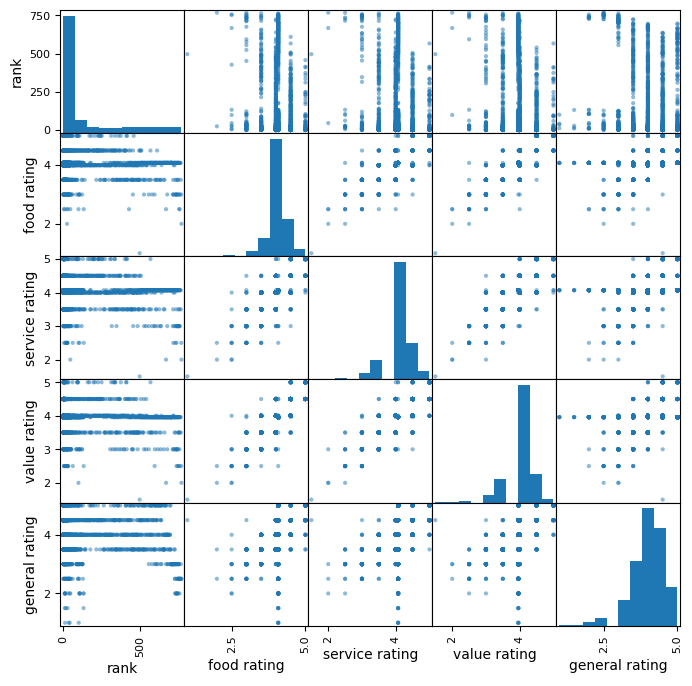

In [93]:
pd.plotting.scatter_matrix(df[["rank", "food rating", "service rating"
               , "value rating",'general rating']], figsize = (8,8));

### Wordcloud reviews

Wordclouds can give a insight in which words occur the most and thus it might give us an insight on what which words are important to look for. We will compare the words that appear in 'high' rated restaurants and 'low' rated restaurants.

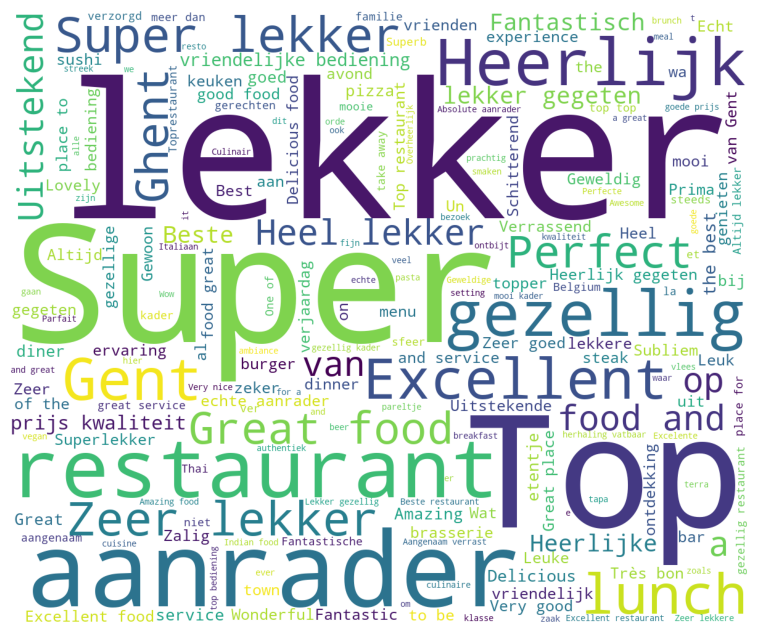

In [113]:
from wordcloud import WordCloud
# From the df_train_reviews dataframe, create a wordcloud of the title column
# but only for restaurants with a rating higher than 4.5
wordcloud = WordCloud(background_color='white', width=1200, height=1000, stopwords=['een', 'i', 'is', 'voor', 'de', 'het', 'en', 'met', 'in', 'eten', 'maar']).generate(" ".join(df_train_reviews.loc[df_train_reviews['rating'] > 4.5]['title'].astype(str)))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


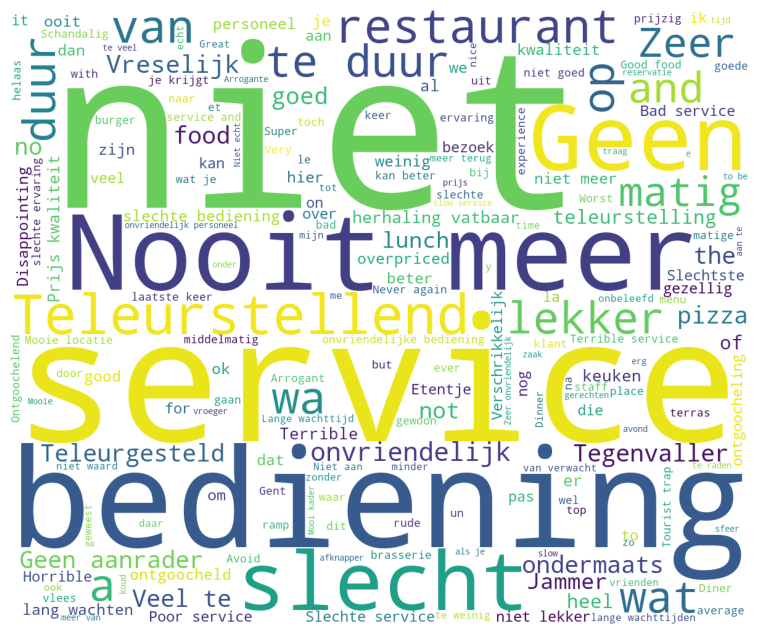

In [114]:
# From the df_train_reviews dataframe, create a wordcloud of the title column
# but only for restaurants with a rating lower then 2.5
# do not include the words 'een', 'voor', 'de', 'het', 'en', 'met'
wordcloud = WordCloud(background_color='white', width=1200, height=1000, stopwords=['een', 'i', 'is', 'voor', 'de', 'het', 'en', 'met', 'in', 'eten', 'maar']).generate(" ".join(df_train_reviews.loc[df_train_reviews['rating'] < 2.5]['title'].astype(str)))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


We can clearly see that there is a big difference in the words that are used when describing a restaurant that has a good or a bad rating. We can conclude that the words used in a review can give a good indication of the score of a restaurant. Let's see if that is true:

In [136]:
bad_words = {"slecht", "onvriendelijk", "ondermaats", "geen aanrader", "tegenvaller", "teleurstellend", "vreselijk"}
good_words = {"uitstekend", "heerlijk", "top", "geweldig", "prima", "aanrader", "fantastisch", "super"}

# create a list of all the restaurants that have one of the bad words in one of their reviews
bad_restaurants = []
for i in bad_words:
    bad_restaurants.extend(list(df_train_reviews.loc[df_train_reviews['title'].str.contains(i, na=False)]['id'].unique()))

# create a list of all the restaurants that have one of the good words in one of their reviews
good_restaurants = []
for i in good_words:
    good_restaurants.extend(list(df_train_reviews.loc[df_train_reviews['title'].str.contains(i, na=False)]['id'].unique()))


# calculate the average score of the restaurants in bad_restaurants
bad_restaurants_score = df.loc[df['id'].isin(bad_restaurants)]['general rating'].mean()
print("Average score of 'bad' restaurants: ", bad_restaurants_score)
# calculate the average score of the restaurants in good_restaurants
good_restaurants_score = df.loc[df['id'].isin(good_restaurants)]['general rating'].mean()
print("Average score of 'good' restaurants: ", good_restaurants_score)

Average score of 'bad' restaurants:  3.739784946236559
Average score of 'good' restaurants:  4.056370302474794


### Price and popularity

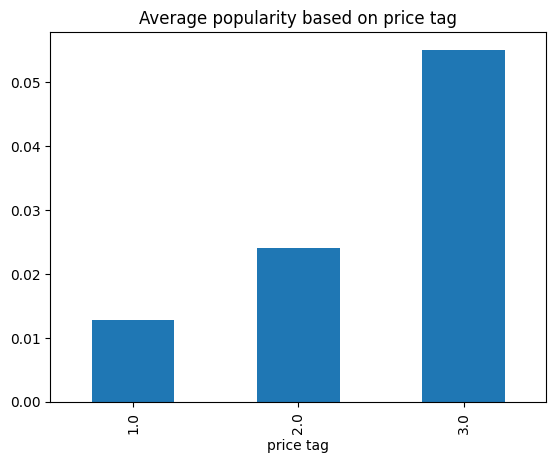

In [138]:
# create a bar plot of the average popularity compared to the price tag column
df.groupby('price tag')['popularity'].mean().plot(kind='bar', title='Average popularity based on price tag');

We can clearly see that it seems that the more expensive restaurants tend to have a higher popularity. Note that a highly popular restaurant might have the possiblity to increase their prices as they are so popular.

# Werkverdeling

Importing data: Bram, Maxime, Ewoud
Split in test & train: Bram, Maxime, Ewoud

Data Clean-up:
- General rating, number of reviews & ranks: Bram, Maxime
- Restaurants with no reviews: Maxime
- Price range: Bram, Maxime
- Food, service & value rating: Bram, Maxime, Ewoud
- Meals: Bram
- Cuisines: Bram, Maxime
- Address: Bram,
- Restaurant features: Ewoud
- Special diets: Ewoud
- Price tag: Ewoud
- Website and Menu: Bram, Maxime
- Michelin, travelers choice and timetable: Bram
- Phone number and Email address: Bram, Maxime, Ewoud
- Tags: Ewoud
- Restaurant popularity and Average review: Ewoud

Data analysis: 
- Michelin: Bram
- Timetable: Bram
- Travelers choice: Bram
- Restaurant features: Ewoud
- Ratings: Bram
- Ratings compared to price: Bram
- Wordcloud reviews: Maxime
- Price and popularity: Maxime